#  scraping app info and reviews from Google Play

## import libraries

In [137]:
import pandas as pd

from google_play_scraper import app, Sort, reviews,reviews_all

import play_scraper

import matplotlib.pyplot as plt

import csv

from wordcloud import WordCloud, STOPWORDS

from bidi.algorithm import get_display 

import advertools as adv

import datetime as dt



## get apps ids 

In [139]:
# Our app ids from google play

app_ids = {'instagram':'com.instagram.android',
       'TikTok':'com.zhiliaoapp.musically',
       'tinder':'com.tinder',
       'waze':'com.waze'}


# colum of interest to view for app data

cols_of_interest = ['title', 'summary','minInstalls',
             'ratings','genre','reviews','score',
             'free','released','editorsChoice',
            'similarApps']

# CSV for project

app_comparison_csv = 'app_comparison.csv'

reviews_csv = 'reviews.csv'

## gets app info

In [140]:
app_info = []

for id in app_ids:
    info = app(app_ids[id])
    app_info.append(info)   

## make dataframe and csv file 

In [141]:
info_df = pd.DataFrame(app_info)


info_df = info_df[cols_of_interest]

info_df = pd.DataFrame(info_df).to_csv(app_comparison_csv, encoding="utf8")


In [142]:
pd.read_csv(app_comparison_csv)

,Unnamed: 0,title,summary,minInstalls,ratings,genre,reviews,score,free,released,editorsChoice,similarApps
0,0,Instagram,"Create & share photos, stories, & clips with t...",1000000000,128912363,Social,4282957,4.112511,True,"Apr 3, 2012",False,"['com.snapchat.android', 'com.whatsapp', 'com...."
1,1,TikTok,Join your friends and discover videos you love...,1000000000,43664560,Social,1745872,4.528929,True,"Jul 9, 2015",False,"['video.like', 'com.snapchat.android', 'com.in..."
2,2,Tinder - Dating & Make Friends,"App to Match, Chat & Date with New People - on...",100000000,4489521,Lifestyle,227879,3.045296,True,"Jul 15, 2013",False,"['com.bumble.app', 'com.ftw_and_co.happn', 'co..."
3,3,"Waze - GPS, Maps, Traffic Alerts & Live Naviga...",Save time on every drive. Waze tells you about...,100000000,8447718,Maps & Navigation,625157,4.436002,True,NaN,False,"['com.microsoft.office.outlook', 'com.ubercab'..."


# Data Visualization 

### Installations By App millions

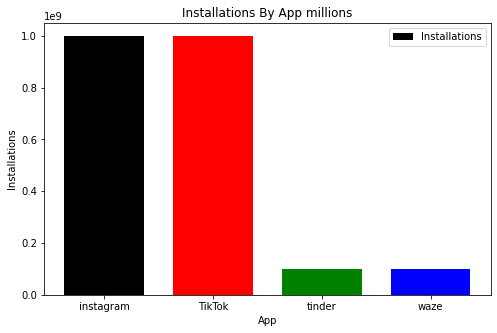

In [143]:
x = []
y = []

plt.figure(figsize=(8,5))  
with open(app_comparison_csv,'r',encoding="utf8") as csvfile:
    plots = csv.reader(csvfile, delimiter = ',') 
    next(plots, None)
    for row in plots:
        y.append(int(float(row[3])))
    for i in app_ids:
        x.append(i)

plt.bar(x, y,color = ['black', 'red', 'green', 'blue', 'cyan','grey'], width = 0.73, label = 'Installations')
plt.xlabel('App')
plt.ylabel('Installations')
plt.title('Installations By App millions')
plt.legend()
plt.show()

### Avarage Rating By App 

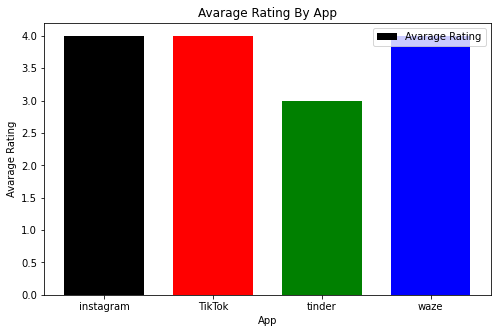

In [144]:

x = []
y = []

plt.figure(figsize = (8,5))  

with open(app_comparison_csv,'r',encoding="utf8") as csvfile:
    plots = csv.reader(csvfile, delimiter = ',')
    next(plots, None) 
    
    for row in plots:
        y.append(int(float(row[7])))
    
    for i in app_ids:
        x.append(i)

plt.bar(x, y,color = ['black', 'red', 'green', 'blue', 'cyan','grey'], width = 0.73, label = 'Avarage Rating')
plt.xlabel('App')
plt.ylabel('Avarage Rating')
plt.title('Avarage Rating By App')
plt.legend()
plt.show()

### Avarage Rating By App Category

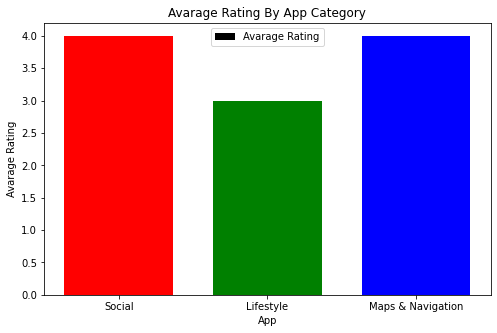

In [145]:
x = []
y = []

plt.figure(figsize=(8,5))  

with open(app_comparison_csv,'r',encoding="utf8") as csvfile:
    plots = csv.reader(csvfile, delimiter = ',')
    next(plots, None) 
    
    for row in plots:
        y.append(int(float(row[7])))
        x.append(row[5])

plt.bar(x, y,color = ['black', 'red', 'green', 'blue', 'cyan','grey'], width = 0.73, label = 'Avarage Rating')
plt.xlabel('App')
plt.ylabel('Avarage Rating')
plt.title('Avarage Rating By App Category')
plt.legend()
plt.show()

###  Amount Of Reviews By App

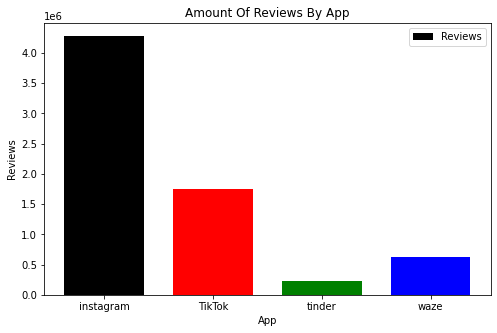

In [146]:
x = []
y = []

plt.figure(figsize=(8,5))  

with open(app_comparison_csv,'r',encoding="utf8") as csvfile:
    plots = csv.reader(csvfile, delimiter = ',')
    next(plots, None) 
    
    for row in plots:
        y.append(int(float(row[6])))
    
    for i in app_ids:
        x.append(i)

plt.bar(x, y,color = ['black', 'red', 'green', 'blue', 'cyan','grey'], width = 0.73, label = 'Reviews')
plt.xlabel('App')
plt.ylabel('Reviews')
plt.title('Amount Of Reviews By App')
plt.legend()
plt.show()

## get app reviews

In [ ]:
# collect reviews for app from google store


result = reviews_all(app_ids.get("tinder"))



In [105]:
# Fetch a list data
comments = []
for r in result:
    comment = [r['userName'],
               r['content'],
               r['score'],
               r['at']
              ]
    comments.append(comment)

header = ['User Name', 'Review', 'Rate', 'Date']
pd.DataFrame(comments, columns=header).to_csv(reviews_csv)


In [106]:
df

,Unnamed: 0,User Name,Review,Rate,Date
0,0,Angelica Tungcab,Wa kwenta,1,2021-12-27 19:56:57
1,1,Kirsty John,Its a very good game,1,2021-12-25 21:12:26
2,2,Tammana Sultana munni,Good app,5,2021-12-25 19:45:06
3,3,Khadija Tasnim,"It Says its free but its not, you can not play it",1,2021-12-24 13:25:14
4,4,boba tea,this used to be my favorite app before :(( the...,2,2021-12-23 16:18:25
...,...,...,...,...,...
24197,24197,Angela Holmes,"It keeps freezing all the time, like every sin...",3,2014-11-20 00:13:53
24198,24198,Yiesan L,"Loved it but why is the song like stand by me,...",3,2014-11-19 16:30:29
24199,24199,Kyndall Taylor,Cool,5,2014-11-19 11:49:18
24200,24200,A Google user,Great app,5,2014-11-17 23:12:33


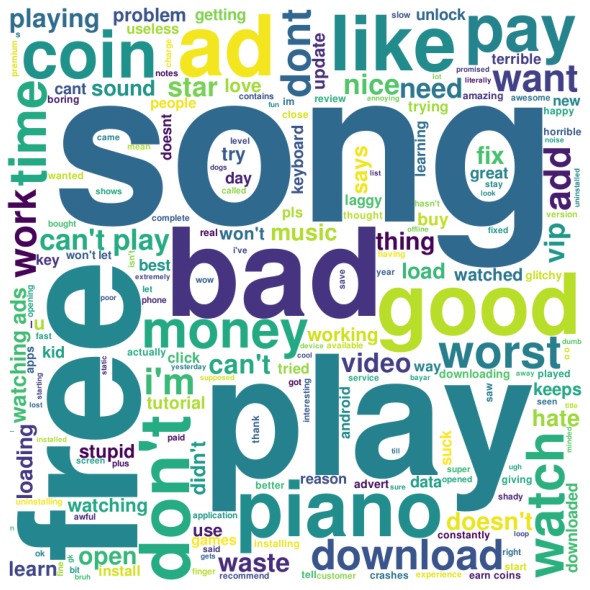

In [118]:
# Python program to generate WordCloud
 

# read csv file
df = pd.read_csv(reviews_csv)

# filter by rewviw rate
df = df[df['Rate']<3]

# filter by single year
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df[df['Date'].dt.strftime('%Y') > '2020']

comment_words = ''

# remove stopwords in english and hebrew
remove={'app','game'}
union_stopwords = set.union(adv.stopwords['hebrew'], adv.stopwords['english'],remove)

stopwords = union_stopwords

# iterate through the csv file
for val in df.Review:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "

# use get_display to display hebrew 
# comment_words=get_display(comment_words) 

wordcloud = WordCloud(font_path='FreeSansBold.ttf',
                    width = 800, height = 800,
                    background_color ='white',
                    stopwords = union_stopwords,
                    min_font_size = 10,
                    collocations=True).generate(comment_words)

# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

## Fetch a list of autocompleted query suggestion

In [75]:
import play_scraper

print(play_scraper.suggestions('moveit'))

['moveit', 'moveit bus app', 'moveitpro', 'moveit transfer', 'moveit move media to sd card']


## Fetch a list of applications matching a search query

In [76]:
print(play_scraper.search('the station', page=2))

[{'app_id': 'com.ridewithvia.zuzu', 'url': '/store/apps/details?id=com.ridewithvia.zuzu', 'icon': 'https://play-lh.googleusercontent.com/U1Fww08aIXfkrrsuBAnevg8EWi5axf6p14685dGnRGX7ig07NFl2C2fGfZSY3plNGec=s128-rw', 'title': 'The Station', 'developer': 'Via Transportation Inc.', 'developer_id': 'Via Transportation Inc.', 'description': 'Plan and pay for your public transportation trips in Israel with The Station app', 'score': None, 'full_price': '0', 'price': '0', 'free': True}, {'app_id': 'money.terra.station', 'url': '/store/apps/details?id=money.terra.station', 'icon': 'https://play-lh.googleusercontent.com/sUJQKb2HeZZ4y2dFuHhVoCheiX2fR2It35fgU4_6ow0i51EgsgvZLfjXUrLQo_Of6Fs=s128-rw', 'title': 'Terra Station', 'developer': 'Terraform Labs', 'developer_id': 'Terraform Labs', 'description': 'Official wallet app for holding assets and accessing dApps on the Terra network', 'score': None, 'full_price': '0', 'price': '0', 'free': True}, {'app_id': 'com.istation.runtime', 'url': '/store/ap